In [1]:
import pandas as pd
import numpy as np
import json
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt
import seaborn as sb
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [2]:
business_df = pd.read_json('yelp_business.json',lines=True)
coffee_df = business_df[business_df['categories'].str.contains('Coffee')==True]

In [3]:
review_df = pd.read_json('yelp_review.json',lines=True)

In [4]:
coffee_review_df = pd.merge(coffee_df, review_df, how='inner', left_on='business_id', right_on='business_id')
coffee_review_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",D1GisLDPe84Rrk_R4X2brQ,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444686,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41,...,"Specialty Food, Food, Coffee & Tea, Coffee Roa...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '...",GgUyYrW9NgqRxgbR-iRv_A,P2FzNMi1ny1CBCsX591Egg,5,5,0,1,The coffee here is delicious and I love the at...,2016-11-08 00:02:30
444687,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41,...,"Specialty Food, Food, Coffee & Tea, Coffee Roa...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '...",tNDn3dD4XQ0me6DaDWPgOw,Ay1lQmdy-kFLJuuV7gx1Iw,5,1,0,1,If you ever find yourself in Tucson wanting a ...,2021-11-09 19:54:44
444688,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41,...,"Specialty Food, Food, Coffee & Tea, Coffee Roa...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '...",IEBqOU967RCgzypFUoBXcw,xfSiMtuhrlZNszvU2q_bCQ,5,0,0,0,"I meet my friends, sit outside at the tables, ...",2021-11-19 01:06:00
444689,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41,...,"Specialty Food, Food, Coffee & Tea, Coffee Roa...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '...",5s4Lz9XSviVshyzEw-KYwg,MBBx6MtDr2CC2TPpoypQnA,5,2,0,1,"Great coffee, and fun to stay and get a Frenc...",2021-03-05 20:27:34


In [5]:
coffee_review_df=coffee_review_df[['business_id','stars_y','text','date']]

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rfield/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stops = set(stopwords.words('english'))
stops.update(['','-','would','get',"i'm",'came', 'it','went','go','one','two','place','even','got',"i've",'also'])

print(stops)

{'', 'so', "weren't", 'does', 'been', 'y', 'haven', 'themselves', 'no', "needn't", 'had', 'by', 're', 'being', 'on', 'the', 'there', 'ain', 't', 'also', 'his', "wouldn't", 'would', 'with', "wasn't", 'mightn', 'yours', "doesn't", 'ours', 'what', 'where', "mustn't", 'above', 's', "should've", 'him', 'because', 'was', 'against', 'out', 'some', 'hadn', "shouldn't", "shan't", 'why', 'am', 'and', 'same', 'such', 'up', 'here', 'over', 'hasn', 'below', 'nor', 'through', 'both', 'did', 'during', 'too', "that'll", 'under', 'how', 'weren', 'in', 'most', "don't", 'them', 'o', 'didn', 'mustn', 'at', 'very', 'theirs', "isn't", 'just', 'own', 'two', 'go', "it's", 'as', 've', 'you', 'they', 'other', "aren't", "mightn't", 'your', 'hers', 'we', 'that', 'went', '-', 'itself', 'isn', 'my', 'their', 'again', 'whom', 'me', 'a', 'can', 'doesn', 'himself', 'place', 'between', 'will', 'myself', 'about', 'of', 'but', 'll', "hadn't", 'it', 'yourself', 'these', 'yourselves', "you'd", 'm', 'aren', "won't", 'then',

In [8]:
sw_df = pd.DataFrame(stops, columns=['stopword'])

In [27]:
coffee_review_df['text_2']=coffee_review_df['text'].replace({'\n':'','.':''})

/var/folders/51/9blxfs2d63z7pklqkjxmrpwr0000gq/T/ipykernel_52348/2565841798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_review_df['text_2']=coffee_review_df['text'].replace({'\n':'','.':''})


In [15]:
from collections import Counter

no_sw = coffee_review_df.text.apply(lambda word: [word.lower() for word in word.split(' ') if word.lower() not in stops])


corpus = []
for ea in no_sw:
    corpus += ea
wordDict = Counter(corpus)

[(k, v) for k, v in sorted(wordDict.items(), key=lambda item: item[1], reverse=True )][:20]

[('coffee', 203798),
 ('great', 142894),
 ('food', 130976),
 ('like', 130327),
 ('good', 123051),
 ('really', 96327),
 ('time', 85552),
 ('love', 79354),
 ('back', 77209),
 ('service', 74448),
 ('little', 70080),
 ('always', 68802),
 ('order', 65581),
 ('ordered', 64671),
 ('nice', 63514),
 ('best', 61415),
 ('staff', 61278),
 ('breakfast', 60935),
 ('definitely', 58444),
 ('try', 58061)]

In [16]:
def common_words(df):
    no_sw = df.text.apply(lambda word: [word.lower() for word in word.split(' ') if word.lower() not in stops][:20])
    return no_sw

In [17]:
def common_words(df):
    no_sw = df.text.apply(lambda word: [word.lower() for word in word.split(' ') if word.lower() not in stops])


    corpus = []
    for ea in no_sw:
        corpus += ea
    wordDict = Counter(corpus)

    return [(k, v) for k, v in sorted(wordDict.items(), key=lambda item: item[1], reverse=True)][:20]

In [19]:
for i in range(1,6):
    print('Common words in reviews with ', i, ' stars')
    #common_words(review_small_df[review_small_df['stars']==i])
    print(common_words(coffee_review_df[coffee_review_df['stars_y']==i]))

Common words in reviews with  1  stars
[('order', 18592), ('food', 17858), ('like', 17432), ('coffee', 15613), ('time', 14672), ('never', 13188), ('service', 12115), ('ordered', 11833), ('back', 11601), ('asked', 11516), ('said', 11249), ('minutes', 10995), ('told', 9448), ('people', 9143), ('us', 8933), ('drive', 8558), ('customer', 8414), ('could', 8408), ('make', 7694), ('going', 7297)]
Common words in reviews with  2  stars
[('coffee', 13986), ('like', 13854), ('food', 13171), ('good', 8939), ('time', 8796), ('order', 8402), ('ordered', 8355), ('really', 8115), ('service', 7830), ('back', 6176), ('people', 5353), ('minutes', 5017), ('asked', 4992), ('make', 4694), ('could', 4622), ('us', 4621), ('much', 4516), ('it.', 4452), ('staff', 4439), ('come', 4204)]
Common words in reviews with  3  stars
[('coffee', 21787), ('like', 19386), ('good', 17468), ('food', 16901), ('really', 13240), ('time', 9836), ('little', 9537), ('service', 9299), ('ordered', 9129), ('pretty', 8760), ('great',

In [20]:
star_1 = common_words(coffee_review_df[coffee_review_df['stars_y']==1])
star_2 = common_words(coffee_review_df[coffee_review_df['stars_y']==2])
star_3 = common_words(coffee_review_df[coffee_review_df['stars_y']==3])
star_4 = common_words(coffee_review_df[coffee_review_df['stars_y']==4])
star_5 = common_words(coffee_review_df[coffee_review_df['stars_y']==5])

star_1=dict(star_1)
star_2=dict(star_2)
star_3=dict(star_3)
star_4=dict(star_4)
star_5=dict(star_5)

stars_list = [star_1, star_2, star_3, star_4, star_5]

In [23]:
from wordcloud import WordCloud

In [24]:
def wordcloud_print(d_l):
    for i in range(0,5):
        wc = WordCloud(width =500, height =250).generate_from_frequencies(d_l[i])
        plt.figure(figsize=(6,4))
        plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
        plt.imshow(wc)
        c=i+1
        title = str(c) + ' star reviews'
        plt.title(title, fontsize=20)

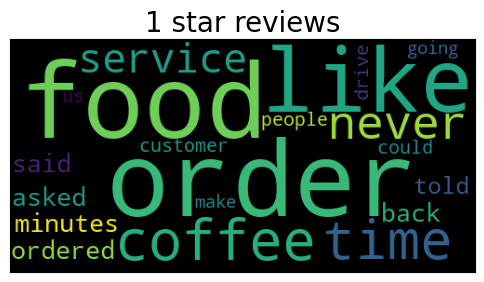

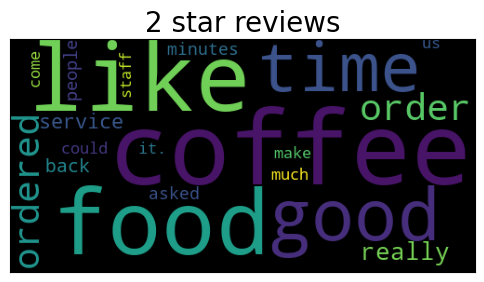

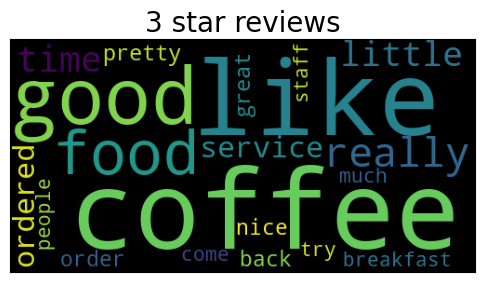

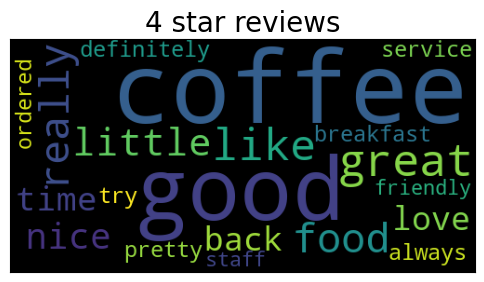

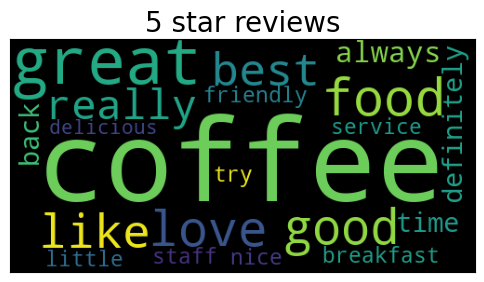

In [25]:
wordcloud_print(stars_list)

In [22]:
pip install wordcloud

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 3.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.2.2-cp39-cp39-macosx_12_0_arm64.whl size=154142 sha256=326d066eecf529f30feb62eb3f4eb5994a6b1a38363dd930375a9f019dd8acf5
  Stored in directory: /Users/rfield/Library/Caches/pip/wheels/ae/f0/00/88867fa0febe7071860ee43ade45905c63da709d3a0037776a
Successfully built wordcloud
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configur